In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from xgboost.sklearn import XGBClassifier
import joblib

In [11]:
df = pd.read_csv('/content/drive/My Drive/PI/Dataset_for_VK_project.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
df.head()


,uid,has_photo,sex,has_mobile,followers_count,contacts,relatives,relation,personal,activities,...,deg_centr,average_neighbor_degree,average_degree_connectivity,k_nearest_neighbors,degree_centrality,closeness_centrality,betweenness_centrality,diameter,average_shortest_path_length,target
0,648249344,0,2,1.0,0.0,0,1,1,1,1,...,1.000000,6.482493e+08,0.000000,0.000000,1.000000,0.000000,0.000000,0,0,0
1,645333001,1,2,1.0,2.0,0,0,0,0,0,...,0.257143,2.612393e+08,7.508862,7.508862,0.257143,0.588401,0.057143,2,1,0
2,651165709,1,2,1.0,9.0,0,1,1,1,1,...,0.038501,4.023961e+08,34.912425,34.912425,0.038501,0.511661,0.006917,2,1,0
3,649232401,1,1,1.0,0.0,0,0,0,0,0,...,1.000000,6.492324e+08,0.000000,0.000000,1.000000,0.000000,0.000000,0,0,0
4,639664147,0,1,1.0,1.0,0,1,1,1,1,...,0.260000,3.456780e+08,10.625207,10.625207,0.260000,0.584422,0.032174,2,1,0


In [13]:
df.shape

(11766, 40)

In [14]:
df.columns

Index(['uid', 'has_photo', 'sex', 'has_mobile', 'followers_count', 'contacts',
       'relatives', 'relation', 'personal', 'activities', 'music', 'movies',
       'tv', 'books', 'about', 'quotes', 'albums', 'audios', 'followers',
       'friends', 'pages', 'photos', 'subscriptions', 'videos',
       'clips_followers', 'age', 'city', 'country', 'avg_cl', 'trans',
       'deg_centr', 'average_neighbor_degree', 'average_degree_connectivity',
       'k_nearest_neighbors', 'degree_centrality', 'closeness_centrality',
       'betweenness_centrality', 'diameter', 'average_shortest_path_length',
       'target'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11766 entries, 0 to 11765
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   uid                           11766 non-null  int64  
 1   has_photo                     11766 non-null  int64  
 2   sex                           11766 non-null  int64  
 3   has_mobile                    11766 non-null  float64
 4   followers_count               11766 non-null  float64
 5   contacts                      11766 non-null  int64  
 6   relatives                     11766 non-null  int64  
 7   relation                      11766 non-null  int64  
 8   personal                      11766 non-null  int64  
 9   activities                    11766 non-null  int64  
 10  music                         11766 non-null  int64  
 11  movies                        11766 non-null  int64  
 12  tv                            11766 non-null  int64  
 13  b

In [16]:
df['contacts'].value_counts()

,count
contacts,
0,11766


In [17]:
df.drop('contacts', axis=1, inplace=True)

In [18]:
df['subscriptions'].value_counts()

,count
subscriptions,
0.0,8159
1.0,805
2.0,387
3.0,285
4.0,209
...,...
217.0,1
239.0,1
212.0,1


In [19]:
df[(df.friends > 0) & (df.friends < 500)].friends.describe()

,friends
count,6555.000000
mean,56.147826
std,76.464044
min,1.000000
25%,5.000000
50%,23.000000
75%,76.000000
max,499.000000


In [20]:
df[df.friends > 0].friends.quantile(0.75)

84.0

In [21]:

df['target'].value_counts()

,count
target,
0,9969
1,1797


In [23]:
df[df.uid.isin(df[df.friends > 0].uid)]['target'].value_counts()

,count
target,
0,5180
1,1565


<Axes: >

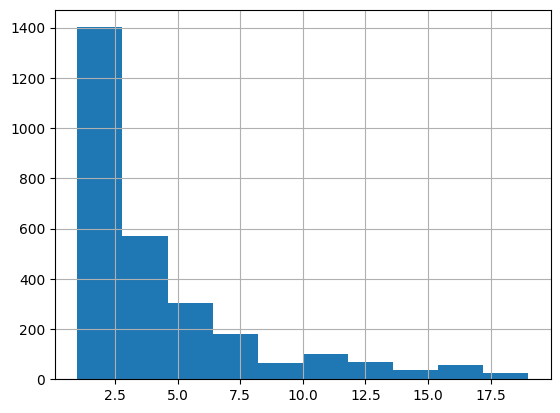

In [24]:
df[(df.followers_count < 20) & (df.followers_count >0)]['followers_count'].hist()

In [25]:
df['city'].value_counts()

,count
city,
0.0,8141
1.0,1164
2.0,337
49.0,116
99.0,109
...,...
1710959.0,1
2367.0,1
1463.0,1


<Axes: ylabel='uid'>

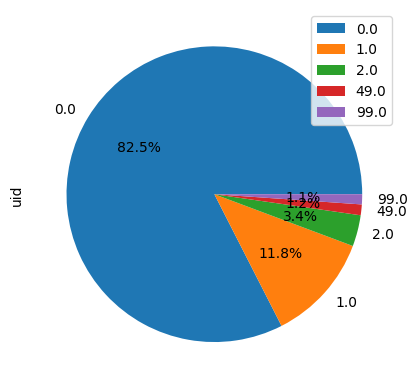

In [26]:
data_with_cities = df.groupby('city').count()
data_with_cities[data_with_cities['uid'] > 100].plot.pie(autopct="%.1f%%", y='uid')

In [27]:
df['sex'].value_counts()

,count
sex,
1,6755
2,4960
0,51


In [28]:
df[df['sex']==0]['target'].value_counts()

,count
target,
0,50
1,1


In [29]:
df[df['sex']==1]['target'].value_counts()

,count
target,
0,5747
1,1008


In [30]:
df[df['sex']==2]['target'].value_counts()

,count
target,
0,4172
1,788


<Axes: >

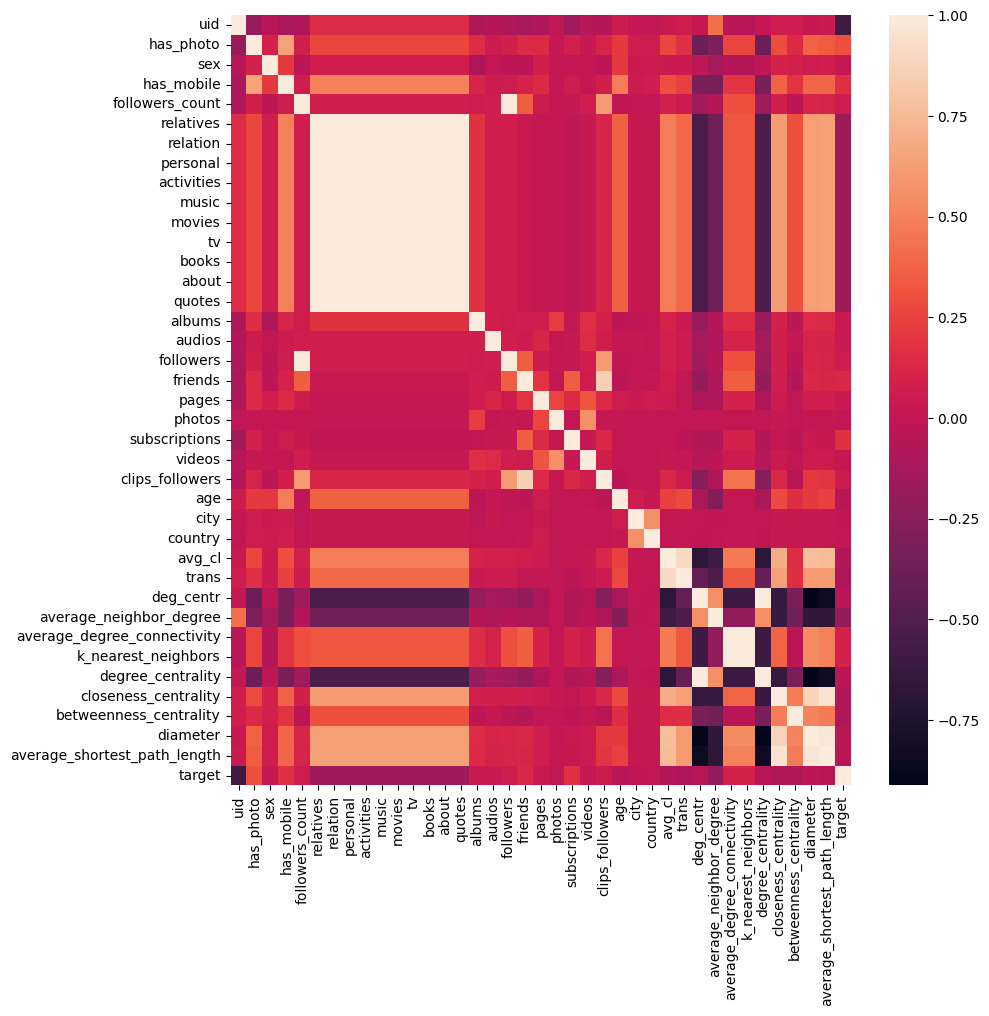

In [31]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, ax=ax)

In [32]:
corr

,uid,has_photo,sex,has_mobile,followers_count,relatives,relation,personal,activities,music,...,deg_centr,average_neighbor_degree,average_degree_connectivity,k_nearest_neighbors,degree_centrality,closeness_centrality,betweenness_centrality,diameter,average_shortest_path_length,target
uid,1.000000,-0.182193,-0.042038,-0.100482,-0.084965,0.145527,0.145527,0.145527,0.145527,0.145527,...,0.020116,0.424484,-0.044502,-0.044502,0.020116,0.060585,0.059767,0.026345,0.036978,-0.596500
has_photo,-0.182193,1.000000,0.094739,0.645549,0.076748,0.261951,0.261951,0.261951,0.261951,0.261951,...,-0.384667,-0.302781,0.258880,0.258880,-0.384667,0.284190,0.136714,0.368414,0.349417,0.293097
sex,-0.042038,0.094739,1.000000,0.210162,-0.028334,0.059933,0.059933,0.059933,0.059933,0.059933,...,-0.014991,-0.127934,-0.064448,-0.064448,-0.014991,0.092469,0.086492,0.056460,0.071573,0.017542
has_mobile,-0.100482,0.645549,0.210162,1.000000,0.053349,0.493540,0.493540,0.493540,0.493540,0.493540,...,-0.320450,-0.327498,0.190929,0.190929,-0.320450,0.366207,0.180073,0.373837,0.383259,0.165748
followers_count,-0.084965,0.076748,-0.028334,0.053349,1.000000,0.068794,0.068794,0.068794,0.068794,0.068794,...,-0.145493,-0.053600,0.291550,0.291550,-0.145493,0.079896,-0.019278,0.118164,0.110844,0.058470
relatives,0.145527,0.261951,0.059933,0.493540,0.068794,1.000000,1.000000,1.000000,1.000000,1.000000,...,-0.529256,-0.361336,0.321946,0.321946,-0.529256,0.614529,0.300598,0.621527,0.639679,-0.158621
relation,0.145527,0.261951,0.059933,0.493540,0.068794,1.000000,1.000000,1.000000,1.000000,1.000000,...,-0.529256,-0.361336,0.321946,0.321946,-0.529256,0.614529,0.300598,0.621527,0.639679,-0.158621
personal,0.145527,0.261951,0.059933,0.493540,0.068794,1.000000,1.000000,1.000000,1.000000,1.000000,...,-0.529256,-0.361336,0.321946,0.321946,-0.529256,0.614529,0.300598,0.621527,0.639679,-0.158621
activities,0.145527,0.261951,0.059933,0.493540,0.068794,1.000000,1.000000,1.000000,1.000000,1.000000,...,-0.529256,-0.361336,0.321946,0.321946,-0.529256,0.614529,0.300598,0.621527,0.639679,-0.158621
music,0.145527,0.261951,0.059933,0.493540,0.068794,1.000000,1.000000,1.000000,1.000000,1.000000,...,-0.529256,-0.361336,0.321946,0.321946,-0.529256,0.614529,0.300598,0.621527,0.639679,-0.158621


In [33]:

df[['relation', 'personal', 'activities', 'music', 'movies', 'tv', 'books', 'about', 'quotes']].head(10)

,relation,personal,activities,music,movies,tv,books,about,quotes
0,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1
7,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0


<Axes: >

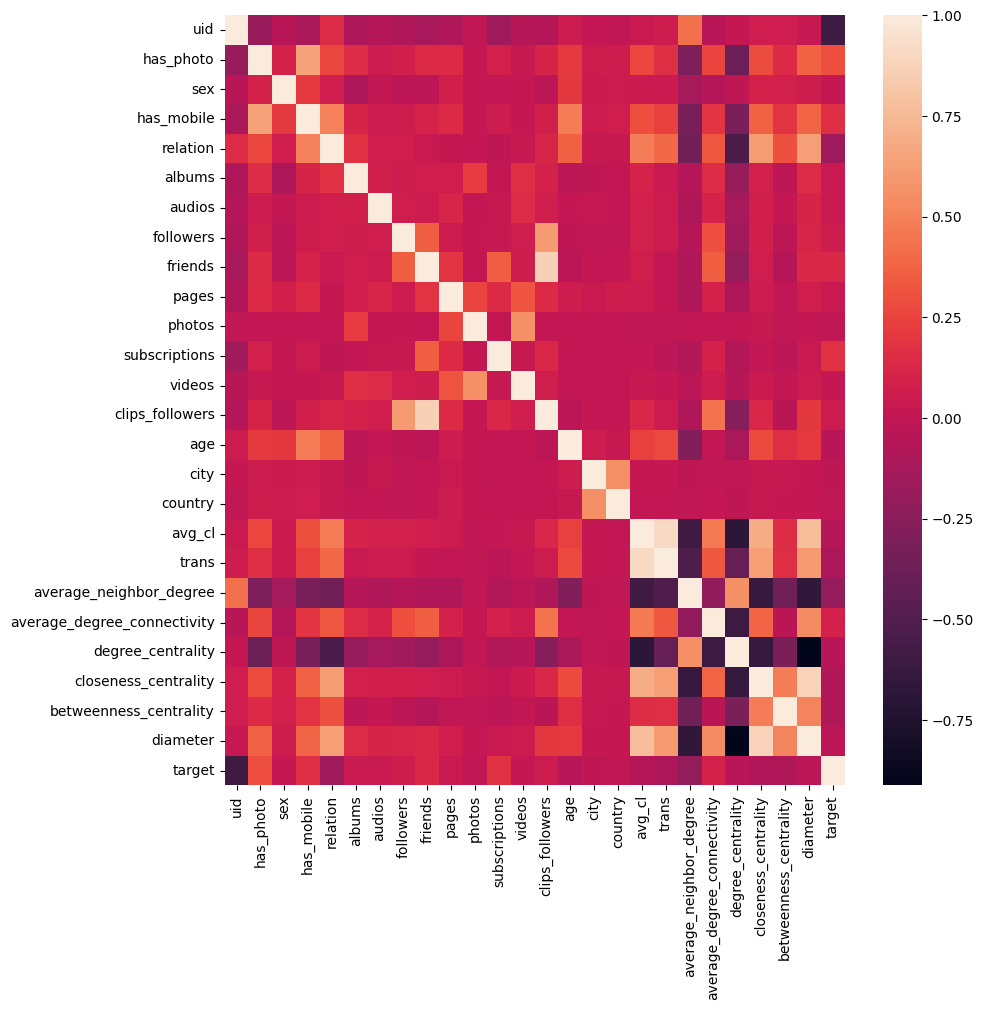

In [34]:
df.drop(['relatives', 'personal', 'activities', 'music', 'movies', 'tv', 'books', 'about', 'quotes'], axis=1, inplace=True)
df.drop('followers_count', axis=1, inplace=True)
df.drop('k_nearest_neighbors', axis=1, inplace=True)
df.drop('deg_centr', axis=1, inplace=True)
df.drop('average_shortest_path_length', axis=1, inplace=True)


corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, ax=ax)

In [35]:
df.drop('uid', axis=1, inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11766 entries, 0 to 11765
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   has_photo                    11766 non-null  int64  
 1   sex                          11766 non-null  int64  
 2   has_mobile                   11766 non-null  float64
 3   relation                     11766 non-null  int64  
 4   albums                       11766 non-null  float64
 5   audios                       11766 non-null  float64
 6   followers                    11766 non-null  float64
 7   friends                      11766 non-null  float64
 8   pages                        11766 non-null  float64
 9   photos                       11766 non-null  float64
 10  subscriptions                11766 non-null  float64
 11  videos                       11766 non-null  float64
 12  clips_followers              11766 non-null  float64
 13  age             

In [37]:
df.shape

(11766, 25)

In [38]:
X = df.drop('target', axis=1)
y = df['target']
X_log = df.drop('target', axis=1)
y_log = df['target']
X_log = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_trai, X_tes, y_trai, y_tes = train_test_split(X_log, y_log, test_size=0.2, random_state=50)
y.value_counts()

,count
target,
0,9969
1,1797


In [39]:
y_train.value_counts()

,count
target,
0,7976
1,1436


In [40]:
parameters_2 = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'random_state':[0, 1]}
model_2 = RandomForestClassifier()
clf_2 = GridSearchCV(model_2, parameters_2)
clf_2.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'random_state': [0, 1]})

In [ ]:
clf_2 = RandomForestClassifier(max_depth=10, random_state=42).fit(X_train, y_train)
predictions_clf_2 = clf_2.predict_proba(X_test)[:, 1]
roc_auc_clf_2 = roc_auc_score(y_test, predictions_clf_2)
print("ROC AUC для clf_2:", roc_auc_clf_2)

print("Classification Report для clf_2:")
print(classification_report(clf_2.predict(X_test), y_test))

In [ ]:
if roc_auc_clf_2 > roc_auc_score(y_test, predictions_clf_2):
    print("clf_2 лучше. Сохраняю clf_2 как model.pkl")
    joblib.dump(clf_2, "model.pkl")
else:
    print("model_2 лучше или одинакова. Оставляю model_2 как model.pkl")
    joblib.dump(model_2, "model.pkl")

In [ ]:
import json

clf_2_params = clf_2.get_params()
with open("clf_2_params.json", "w") as json_file:
    json.dump(clf_2_params, json_file)

print("clf_2 параметры сохранены в clf_2_params.json")